In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('AMCAT_data.xlsx')

In [3]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.shape

(3998, 39)

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

## Performing EDA
### Univariate analysis

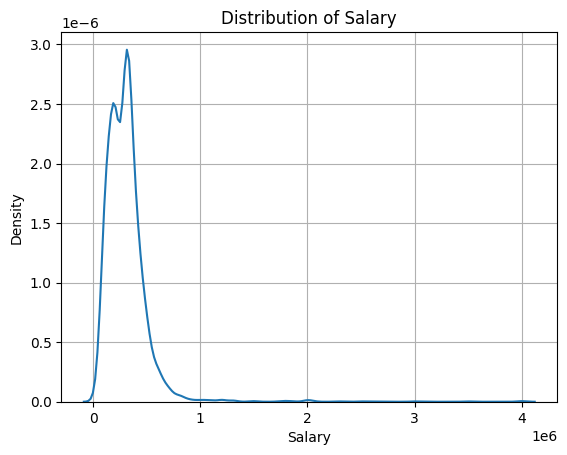

In [7]:
sns.kdeplot(data = df['Salary'])
plt.grid()
plt.title('Distribution of Salary')
plt.show()

Insights:
Mostly the salaries are in the range of 0-1,00,000

In [8]:
df['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', -1, 'mohali',
       'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
       'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon', '

In [9]:
city_corrections = {
    'bangalore': 'Bangalore', 'banglore': 'Bangalore', 'bengaluru': 'Bangalore',
    'gajiabaad': 'Ghaziabad', 'ghaziabaad': 'Ghaziabad', 'nouda': 'Noida', 
    'delhi/ncr': 'NCR', 'new dehli': 'New Delhi', 'mumbai ': 'Mumbai', 'navi mumbai , hyderabad': 'Navi Mumbai',
    'chennai & mumbai': 'Chennai', 'chennai, bangalore': 'Chennai', 'pondi': 'Pondicherry', 'pondy': 'Pondicherry',
    'guragaon': 'Gurgaon', 'gurgoan': 'Gurgaon', 'pune ': 'Pune', 'kolkata ': 'Kolkata', 'kolkata`': 'Kolkata',
    'mysore ': 'Mysore', 'ncr': 'NCR', 'navi mumbai': 'Navi Mumbai', 'hyderabad ': 'Hyderabad',
    'calcutta': 'Kolkata', 'kochi/cochin': 'Kochi', 'madurai ': 'Madurai', 'coimbator': 'Coimbatore',
    'trivandrum ': 'Trivandrum', 'vishakapatnam': 'Visakhapatnam', 'vizag': 'Visakhapatnam', 'vsakhapttnam': 'Visakhapatnam',
    'jaipur ': 'Jaipur', 'kanpur ': 'Kanpur', 'indore ': 'Indore', 'hderabad': 'Hyderabad', 'nasikcity': 'Nashik'
}

df['JobCity'] = df['JobCity'].str.strip().str.lower().replace(city_corrections)

non_city_entries = ['nan', 'india', 'unknown', 'n/a', '-', 'not mentioned', 'remote', 'various locations']
df['JobCity'] = df['JobCity'].replace(non_city_entries, 'Unknown')

In [10]:
df['JobCity'].unique()

array(['Bangalore', 'indore', 'chennai', 'gurgaon', 'manesar',
       'hyderabad', 'noida', 'kolkata', 'pune', nan, 'mohali', 'jhansi',
       'delhi', 'bhubaneswar', 'Navi Mumbai', 'mumbai', 'new delhi',
       'mangalore', 'rewari', 'gaziabaad', 'bhiwadi', 'mysore', 'rajkot',
       'greater noida', 'jaipur', 'thane', 'maharajganj',
       'thiruvananthapuram', 'punchkula', 'bhubaneshwar', 'coimbatore',
       'dhanbad', 'lucknow', 'trivandrum', 'gandhi nagar', 'una',
       'daman and diu', 'Gurgaon', 'Visakhapatnam', 'nagpur', 'bhagalpur',
       'new delhi - jaisalmer', 'ahmedabad', 'Kochi', 'bankura', 'kanpur',
       'vijayawada', 'kochi', 'beawar', 'alwar', 'siliguri', 'raipur',
       'bhopal', 'faridabad', 'jodhpur', 'udaipur', 'muzaffarpur',
       'Kolkata', 'bulandshahar', 'haridwar', 'raigarh', 'visakhapatnam',
       'jabalpur', 'unnao', 'aurangabad', 'belgaum', 'dehradun',
       'rudrapur', 'jamshedpur', 'Noida', 'dharamshala', 'banagalore',
       'hissar', 'ranchi', 

In [11]:
job_city_count = df['JobCity'].value_counts().head(10)

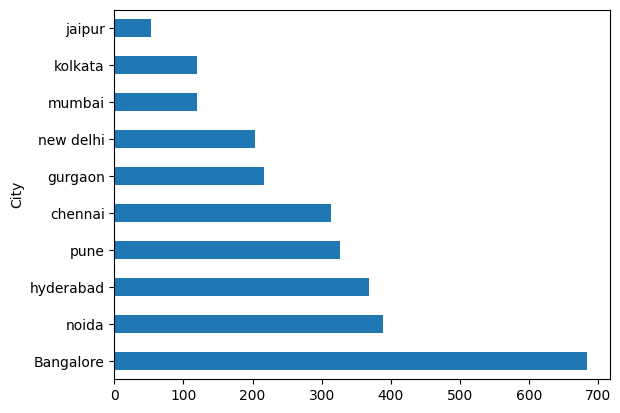

In [12]:
job_city_count.plot( kind = 'barh')
plt.ylabel("City")
plt.show()

## Insights:

### Most of the students were from Banglore followed by Noida, Hyderabad and Pune

In [13]:
df['Designation'].value_counts()

Designation
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: count, Length: 419, dtype: int64

In [14]:
designation_count = df['Designation'].value_counts().head(10)

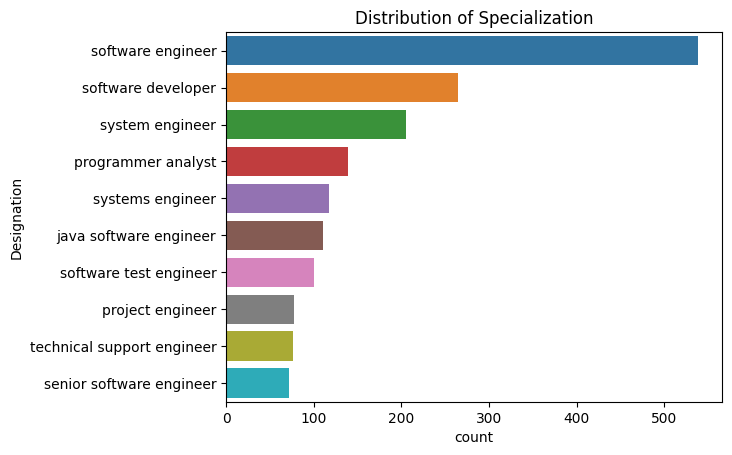

In [15]:
sns.barplot(y = designation_count.index, x = designation_count, hue = designation_count.index)
plt.title("Distribution of Specialization")
plt.ylabel('Designation')
plt.show()

## Insights:
### IT related designation is most common among the students. Where software engineer, software developer, system engineer were most dominance.

In [16]:
df['DOL'] = df['DOL'].apply(lambda x: 'Left' if x != 'present' else x)

In [17]:
status_count = df['DOL'].value_counts()

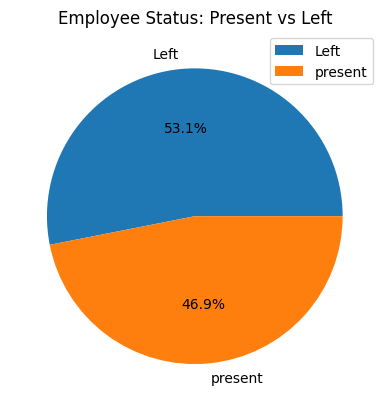

In [18]:
status_count.plot.pie(autopct = '%1.1f%%', labels = status_count.index, legend = True)
plt.title('Employee Status: Present vs Left')
plt.ylabel('')
plt.show()

## Insights:
### From the above pie chart its clear that almost 53% employees left the company

In [19]:
gender_count = df['Gender'].value_counts()

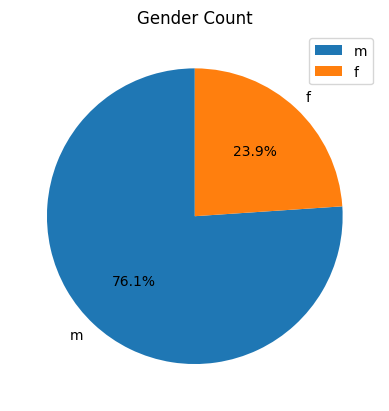

In [20]:
gender_count.plot.pie(autopct = '%1.1f%%', labels = gender_count.index, startangle = 90, legend  = True)
plt.title("Gender Count")
plt.ylabel('')
plt.show()

## Insights:
### ALmost 76% of the employees were Males

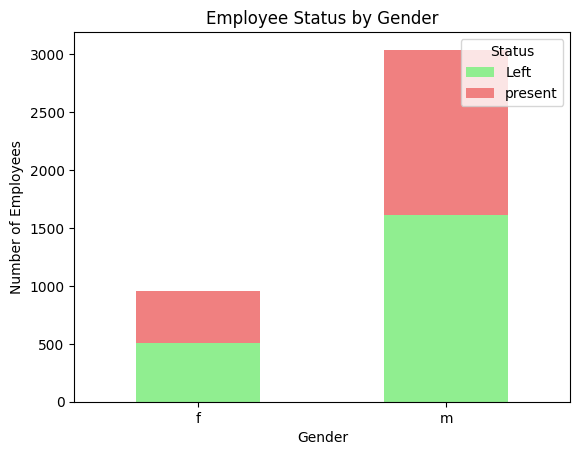

In [21]:
gender_status_counts = df.groupby(['Gender', 'DOL']).size().unstack(fill_value=0)
gender_status_counts.plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'])
plt.title('Employee Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend(title='Status', loc='upper right')
plt.show()

## Insights:
### In context of the status of the employee, both male and female have near about same ratio

In [22]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,Left,get,manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


## Bivariate Analysis

In [23]:
desgn_salary = df.groupby('Designation')[['Salary']].mean().head(10)

In [24]:
desgn_salary.shape

(10, 1)

In [25]:
df_desgn_salary = pd.DataFrame(desgn_salary)

In [26]:
df_desgn_salary

,Salary
Designation,
.net developer,223382.352941
.net web developer,196250.000000
account executive,287500.000000
account manager,350000.000000
admin assistant,102500.000000
administrative coordinator,190000.000000
administrative support,200000.000000
aircraft technician,100000.000000
android developer,200760.869565


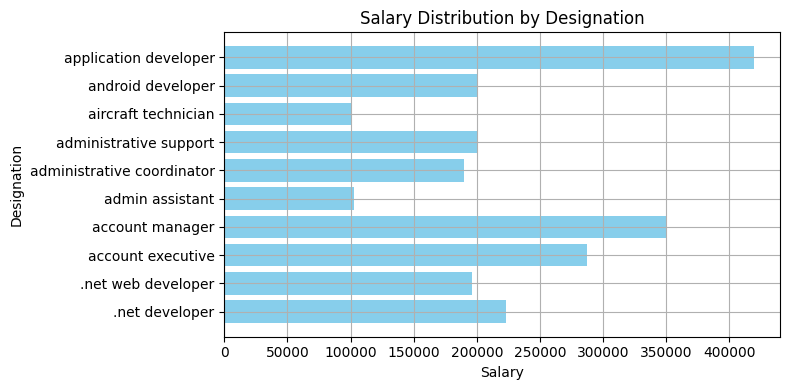

In [27]:
plt.figure(figsize = (8,4))
plt.barh(df_desgn_salary.index, df_desgn_salary['Salary'], color = 'skyblue')
plt.xlabel('Salary')
plt.ylabel('Designation')
plt.title('Salary Distribution by Designation')
plt.grid(True)
plt.tight_layout()
plt.show()

## Insights:
### Application developers has the highest salary as compared to other designations

In [28]:
job_titles = ["programming analyst", "software engineer", "hardware engineer", "associate engineer"]
filtered_data = df[
    (df['Designation'].str.lower().isin(job_titles)) & 
    (df['Specialization'].str.lower().str.contains('computer science'))
]

In [29]:
salary_range_count = filtered_data[(filtered_data['Salary'] >= 250000) & (filtered_data['Salary'] <= 300000)].shape[0]
total_count = filtered_data.shape[0]


salary_range_percentage = (salary_range_count / total_count * 100) if total_count > 0 else 0

filtered_data.head(), total_count, salary_range_percentage


(    Unnamed: 0       ID  Salary        DOJ      DOL        Designation  \
 31       train  1094324  340000 2014-08-01     Left  software engineer   
 48       train   338428  390000 2013-09-01  present  software engineer   
 52       train   794209  400000 2015-04-01  present  software engineer   
 55       train   989860  250000 2014-08-01  present  software engineer   
 113      train  1087220  340000 2015-01-01  present  software engineer   
 
          JobCity Gender        DOB  10percentage  ... ComputerScience  \
 31     Bangalore      m 1992-10-23         77.20  ...             407   
 48     Bangalore      m 1991-02-28         86.60  ...             346   
 52   Navi Mumbai      m 1992-03-09         85.20  ...              -1   
 55     mangalore      m 1992-02-13         90.80  ...             376   
 113    hyderabad      m 1991-04-18         91.43  ...             284   
 
      MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  conscientiousness  \
 31               -1

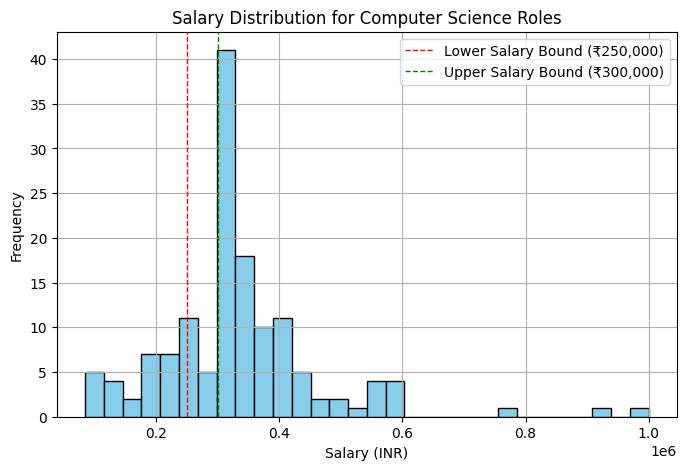

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(filtered_data['Salary'], bins=30, color='skyblue', edgecolor='black')
plt.title('Salary Distribution for Computer Science Roles')
plt.xlabel('Salary (INR)')
plt.ylabel('Frequency')
plt.axvline(250000, color='red', linestyle='dashed', linewidth=1, label='Lower Salary Bound (₹250,000)')
plt.axvline(300000, color='green', linestyle='dashed', linewidth=1, label='Upper Salary Bound (₹300,000)')
plt.legend()
plt.grid(True)
plt.show()

## Insights:
### This graph verifies the claim of the Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.

In [31]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,Left,get,manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


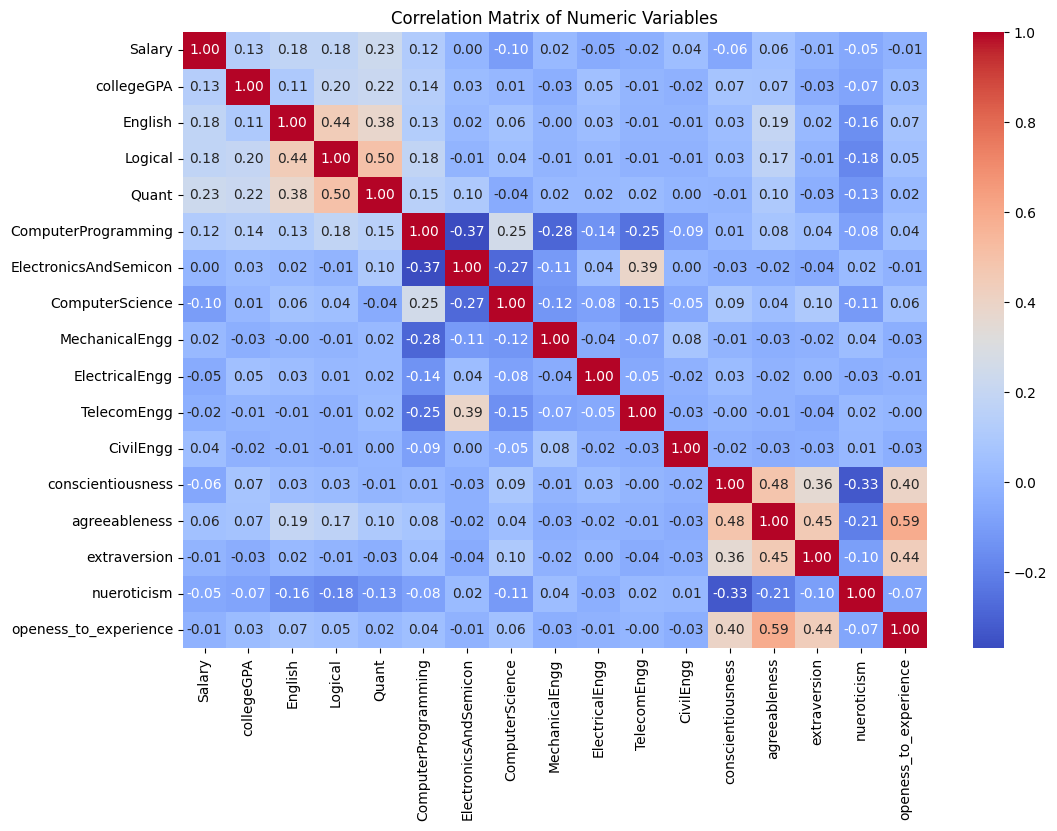

In [32]:
numeric_columns = ['Salary', 'collegeGPA', 'English', 'Logical', 'Quant',
                   'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
                   'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
                   'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
                   'openess_to_experience']

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

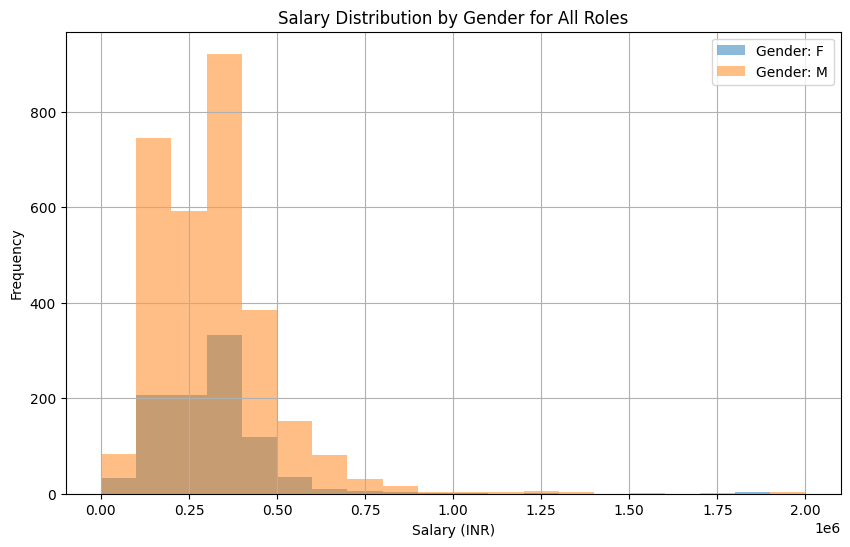

In [33]:
plt.figure(figsize=(10, 6))
for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    plt.hist(subset['Salary'], bins=20, alpha=0.5, label=f'Gender: {gender.upper()}', range=(0, 2000000))

plt.title('Salary Distribution by Gender for All Roles')
plt.xlabel('Salary (INR)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


## Insights:
### Both distributions are right-skewed, with a large number of individuals earning lower salary and fewer individuals earning higher salaries.